## Manuscript Plots

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.ticker as mtick

In [212]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
mpl.rcParams['figure.figsize'] = (6.0, 2.50)
mpl.rcParams['figure.dpi'] = 200

In [67]:
# image sizes
ONECOL = 3.42
THREEHALVESCOL = 4.5
TWOCOL = 7

## Barghi et al (2019) Combined Plots

In [68]:
temp_covs_bs = np.load("../../data/barghi_et_al_2019/temp_covs_bootstrap.npy")
g_cis = np.load("../../data/barghi_et_al_2019/G_bootstrap.npy")
g_averep_cis = np.load("../../data/barghi_et_al_2019/G_averep_bootstrap.npy")

In [228]:
def G_plot(g_cis, g_averep_cis=None, alpha=0.4, linewidth=1.5, ax=None, 
           ylim=None, xlim=None, as_percent=True, hline=True):
    if ax is None:
        fig, ax = plt.subplots()
    _, T, R = g_cis.shape
    y_multiplier = 100. if as_percent else 1.
    x = np.arange(T-1) * 10
    for rep in range(R):
        mean = g_cis[1, 1:, rep]
        ax.plot(x, y_multiplier*mean.ravel(), '-o', linewidth=linewidth, #c=rep,
                alpha=alpha, zorder=rep, markersize=0, solid_capstyle='round')

    if g_averep_cis is not None:
        mean = g_averep_cis[1, 1:]
        lower, upper = g_averep_cis[0, 1:]-mean, mean-g_averep_cis[2, 1:]
        ax.plot(x, y_multiplier*mean, '-', linewidth=linewidth, c='k',
                zorder=np.Inf, markersize=0)
        ax.errorbar(x, y_multiplier*mean, yerr=y_multiplier*np.column_stack([lower.ravel(), upper.ravel()]).T, 
                    capsize=0, elinewidth=linewidth,
                    zorder=np.Inf, alpha=1, c='k', label=None, solid_capstyle='round')

    if ylim is not None:
        plt.ylim(ylim)
    
    if xlim is not None:
        plt.xlim(xlim)
    if hline:
        ax.axhline(y=0, c='0.6', zorder=-1)

    ax.set_xlabel("generation")
    ax.set_ylabel("G")

In [229]:
def cov_plot(cov_cis, ax=None, ngens=1, linewidth=1.5, ylim=None, xlim=None, hline=True, cmap=cm.Set1):
    if ax is None:
        fig, ax = plt.subplots()
    _, T, T = cov_cis.shape

    for refgen in range(T):
        x = ngens + np.arange(refgen, T) * ngens
        mean = cov_cis[1][refgen, (refgen+1):]
        lower, upper = cov_cis[0][refgen, (refgen+1):]-mean, mean-cov_cis[2][refgen, (refgen+1):]
        
        ax.plot(x[:-1], mean, '-', linewidth=linewidth, solid_capstyle='round',  c=cmap(refgen), 
                label=refgen)

        ax.errorbar(x[:-1], mean, yerr=np.column_stack([lower.ravel(), upper.ravel()]).T, 
                    capsize=0, elinewidth=linewidth, c=cmap(refgen),
                    zorder=np.Inf, alpha=1, label=None, solid_capstyle='round')

    if ylim is not None:
        plt.ylim(ylim)
    
    if xlim is not None:
        plt.xlim(xlim)
    plt.xticks(np.arange(0, 51, 10))
    if hline:
        ax.axhline(y=0, c='0.6', zorder=-1)
    ax.set_ylabel("covariance")
    #plt.legend(loc=(0.02, 0.75))

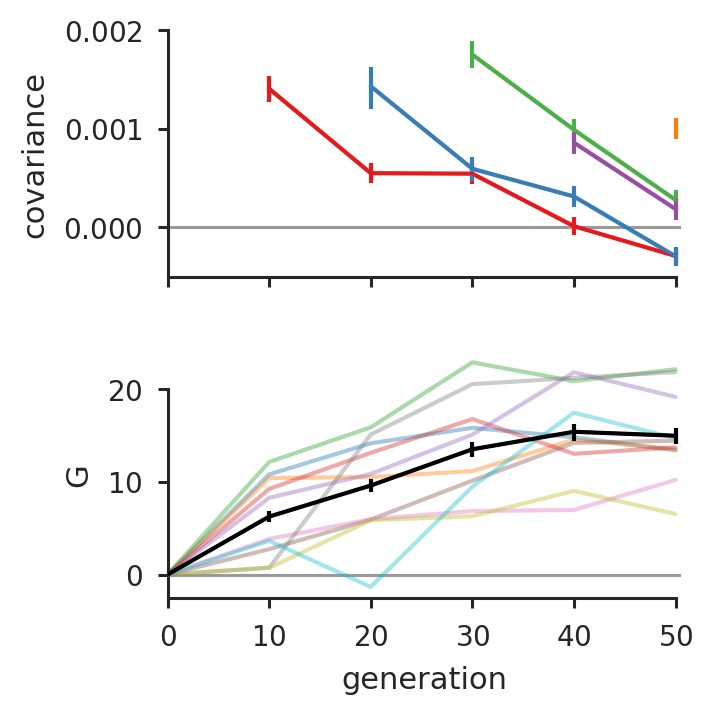

In [235]:
plt.style.use('./buffalo.mplstyle')
plt.rc('text', usetex=False)

fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(ONECOL*1.5, ONECOL*1.1))

cov_plot(temp_covs_bs, ax=ax[0], ngens=10, xlim=(0, 50.5))
G_plot(g_cis, g_averep_cis, ax=ax[1])

# customize plots
ax[0].spines['bottom'].set_bounds(0, 50)
#ax[0].spines['left'].set_bounds(0, 0.002)
#ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
#ax[0].yaxis.set_major_formatter(mtick.LogFormatterMathtext())

ax[1].spines['bottom'].set_bounds(0, 50)
ax[1].spines['left'].set_bounds(-3, 20)

plt.subplots_adjust(wspace=0.3, hspace=0.3, left=.4)
fig.savefig("figure-1.pdf", bbox_inches='tight')

/home/vinceb/miniconda3/envs/basesci/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


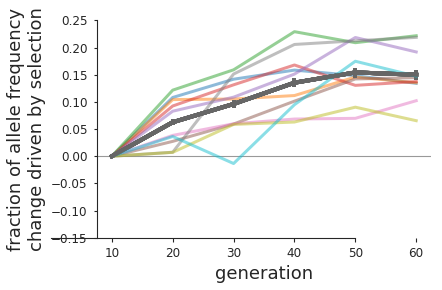

In [10]:
_, T, R = g_cis.shape
fig, ax = plt.subplots()
cols = plt.get_cmap('tab10')
alpha = 0.5



for i, rep in enumerate(np.argsort(g_cis[1, -1, :])[::-1]):
    mean = g_cis[1, 1:, rep]
    lower, upper = g_cis[0, 1:, rep]-mean, mean-g_cis[2, 1:, rep]
    x = np.arange(1, T)

    #xp = [-0.08 + y + i * 0.02 if y != 1 else 1 for y in x]
    xp = x * 10
    ax.plot(xp, mean.ravel(), '-o', linewidth=3, 
            #c='k',
            c=cols(rep), alpha=alpha,
            zorder=rep, markersize=0)
#     ax.errorbar(xp, mean.ravel(),
#                 yerr=np.column_stack([lower.ravel(), upper.ravel()]).T, 
#                 label=rep, capsize=0, linewidth=2,
#                 #c='k', 
#                 c=cols(rep), 
#                 zorder=rep, alpha=alpha)

    
    # average G (across replicates)
    mean = g_averep_cis[1, 1:]
    lower, upper = g_averep_cis[0, 1:]-mean, mean-g_averep_cis[2, 1:]
    x = np.arange(1, T+1) * 10

    # ax.plot(x, mean.ravel(), '-o', linewidth=3, 
    #         c='k',
    #         zorder=rep, markersize=2)
    ax.errorbar(xp, mean.ravel(),
                yerr=np.column_stack([lower.ravel(), upper.ravel()]).T, 
                label=rep, capsize=0, linewidth=4, elinewidth=4,
                c='0.4', 
                zorder=rep)

ax.spines['bottom'].set_bounds(0, 50)
#ax.spines['left'].set_bounds(-0.0832, 0.21)
ax.spines['left'].set_bounds(-0.15, 0.25)
# ax.set_xlim(0.5, 6.5)
ax.set_ylim(-0.15, 0.25)
ax.axhline(y=0, c='0.6')
plt.xlabel("generation", fontsize='18')
#plt.ylabel(r"G = $\frac{\sum_{i \ne j} \mathrm{cov}(\Delta p_i, \Delta p_j)}{\mathrm{var}(p_{60} - p_0)}$", fontsize='18')
plt.ylabel("fraction of allele frequency\nchange driven by selection", fontsize='18')
#plt.legend()
plt.show()